#  Effects of FordGoBike Users information and Trip Characteristics on Trip Duration
## by Doaa Mahmoud Kiwan

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of trips and the profile information of the user who made the trip that can help predict the trip duration. The main focus was on the user's age, user's gender, user's type, day and month at which the trip starts.

## Dataset Overview

> The data consisted of durations and attributes of 1,863,721 FordGoBike rides. The attributes included the  user's age, user's gender, user's type, day and month at which the trip starts, as well as additional measurements such as latitude and longitude of the start and end stations and the name and ID of the start and end stations. 122,165 data points were removed from the analysis due to missing information.

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
import glob
ride = pd.concat([pd.read_csv(f,",") for f in glob.glob("C:/Users/doaam/Downloads/Compressed/FordGoBike" + "/*.csv")],ignore_index=True)
ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [22]:
#drop rows with missing entries
ride.dropna(axis = 0, inplace = True)
ride.reset_index(drop=True, inplace=True)

In [23]:
#Convert start_time and end_time to datetime.
ride["start_time"] = pd.to_datetime(ride["start_time"])
ride["end_time"] = pd.to_datetime(ride["end_time"])

In [24]:
#Create three columns with hour, day and month of the start time
import calendar
ride['start_hour']=ride['start_time'].dt.hour

ride['start_day']=ride['start_time'].dt.weekday_name

ride['start_month']=ride['start_time'].dt.month

ride['start_month'] = ride['start_month'].apply(lambda x: calendar.month_abbr[x])
#drop the start_time column
ride.drop(["start_time"], axis =1, inplace =True)

In [25]:
# convert start hour , day and month into ordered categorical types
ordinal_var_dict = {'start_month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ride[var] = ride[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [26]:
#Replace member_birth_year column with age column for easier analysis and interpretation.
ride["user_age"] = 2018 - ride["member_birth_year"]
#drop the member_birth_year column
ride.drop(["member_birth_year"],axis =1,inplace =True)

## Distribution of Trip Durations


Trip Durations in the dataset take on a very large range of values, from about 60 sec at the lowest, to about 86000 sec at the highest. Plotted on a logarithmic scale, the distribution of trip durations takes on a unimodal shape where the its peak is around 600 sec.

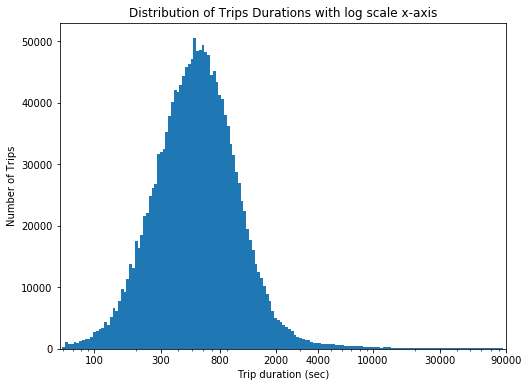

In [27]:
# log scale for trip duration for better illustration of the previous observations
bins = 10**np.arange(1.75, np.log(ride["duration_sec"].max())+0.02, 0.02)
plt.figure(figsize=[8, 6])
plt.hist(data = ride, x = 'duration_sec', bins = bins)
plt.xscale("log")
plt.xticks([100,300, 800, 2000, 4000, 10000, 30000, 90000],[100,300, 800, 2000, 4000, 10000, 30000, 90000])
plt.xlim(0, 90000)
plt.xlabel("Trip duration (sec)")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trips Durations with log scale x-axis");

## Distribution of User Ages

Users ages are calculated from the year of birth. There are some users who are very old (about 140 years old). Plotting ages with maximum of 100 years old, most users are between 30 and 40 years old. There are few users who are older than 60.

In [28]:
#delete rows where users are older than 100 years
ride = ride[ride["user_age"] <= 100]

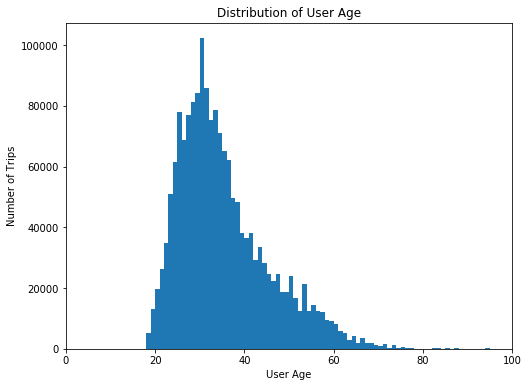

In [29]:
plt.figure(figsize=(8,6))
bins_birth = np.arange(ride["user_age"].min(), ride["user_age"].max()+1, 1)
plt.hist(data = ride , x="user_age", bins = bins_birth)
plt.xlabel("User Age")
plt.ylabel("Number of Trips")
plt.xlim(0,100)
plt.title("Distribution of User Age");

## Distribution of User Gender and Type

The data shows that 89% of the users are subscribers while 11% are customers. When it comes to the gender of the bike service users, 73% of the users are males, 25% are females and 2% are other.


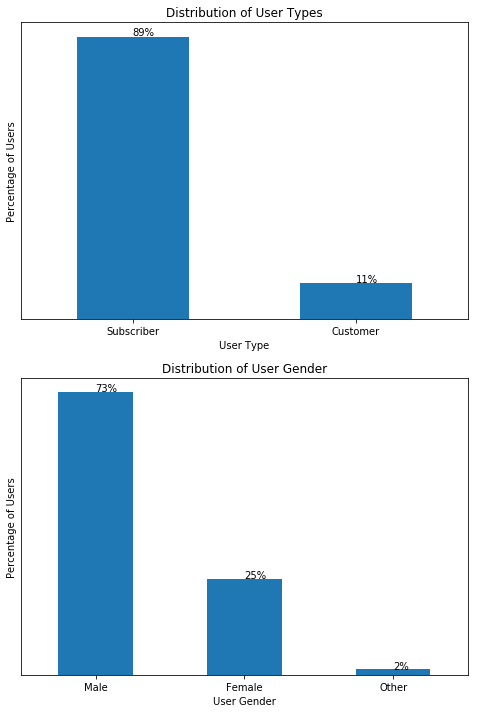

In [30]:
plt.figure(figsize = [8, 12])
ax = plt.subplot(2, 1, 1)
ride['user_type'].value_counts(normalize = True).plot.bar(rot=0)
for p in ax.patches:
    ax.annotate(str(int(100*round(p.get_height(),2)))+"%", (p.get_x()+p.get_width()/2, p.get_height() * 1.005))
plt.yticks([])
plt.ylabel("Percentage of Users")
plt.xlabel("User Type")
plt.title("Distribution of User Types")

ax = plt.subplot(2, 1, 2)
ride['member_gender'].value_counts(normalize = True).plot.bar(rot=0)
for p in ax.patches:
    ax.annotate(str(int(100*round(p.get_height(),2)))+"%", (p.get_x()+p.get_width()/2, p.get_height() * 1.005))
plt.yticks([])
plt.ylabel("Percentage of Users")
plt.xlabel("User Gender")
plt.title("Distribution of User Gender");

## Distributions of Day and Month on which Trip Starts

The distribution of the days at which the trip starts show that the number of bike rides in weekend (Saturday and Sunday) are significantly less than those in weekdays. The distribution of the months at which the trip starts show that there are more rides in warm months (May- Oct) compared to cold ones (Nov-Apr).

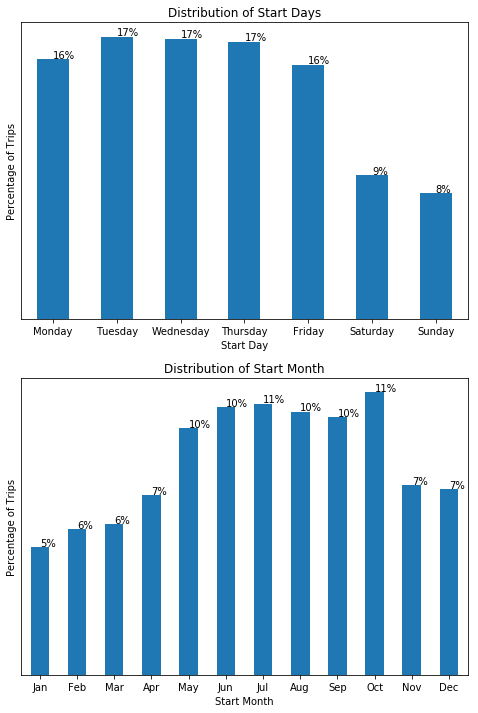

In [31]:
plt.figure(figsize = [8, 12])
ax = plt.subplot(2, 1, 1)
ride['start_day'].value_counts(normalize = True).sort_index().plot.bar(rot=0)
for p in ax.patches:
    ax.annotate(str(int(100*round(p.get_height(),2)))+"%", (p.get_x()+p.get_width()/2, p.get_height() * 1.005))
plt.yticks([])
plt.ylabel("Percentage of Trips")
plt.xlabel("Start Day")
plt.title("Distribution of Start Days")

ax = plt.subplot(2, 1, 2)
ride['start_month'].value_counts(normalize = True).sort_index().plot.bar(rot=0)
for p in ax.patches:
    ax.annotate(str(int(100*round(p.get_height(),2)))+"%", (p.get_x()+p.get_width()/2, p.get_height() * 1.005))
plt.yticks([])
plt.ylabel("Percentage of Trips")
plt.xlabel("Start Month")
plt.title("Distribution of Start Month");

# Trip Duration vs. User Age

Plotting the trip duration aganist the user age shows that most long trips are made by young users (between 20 and 40 years old). Less long trips are made by users between 40 and 70 years old. Very few long trips are made by users older than 70 years

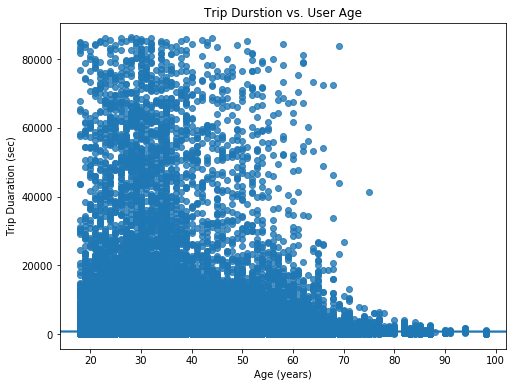

In [32]:
# scatter plot of duration vs. age 
plt.figure(figsize=(8,6))
sb.regplot(data = ride, x='user_age', y="duration_sec")
plt.xlabel('Age (years)')
plt.ylabel('Trip Duaration (sec)')
plt.title("Trip Durstion vs. User Age")
plt.show()

# Trip Duration vs. User Gender

Plotting the boxplot of trip duration with user gender shows that female users make longer bike rides on average the male and other users.

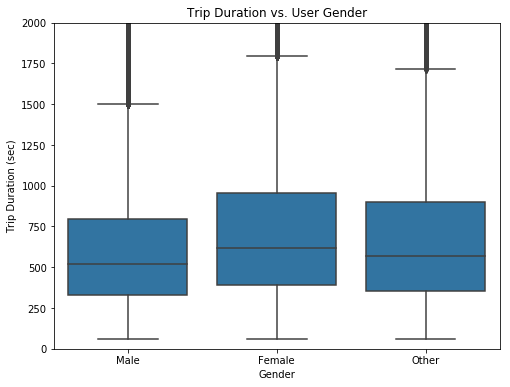

In [33]:
plt.figure(figsize = [8, 6])
default_color= sb.color_palette()[0]
sb.boxplot(data = ride, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.xlabel('Gender')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 2000])
plt.title("Trip Duration vs. User Gender")
plt.show()

# Trip Duration vs. User Type

Although we saw previously that subscribers are significantly more than customers, plotting thr boxplot of trip duration with user type, we can clearly see here that higher percentage of customers are taking longer trips than subscribers.


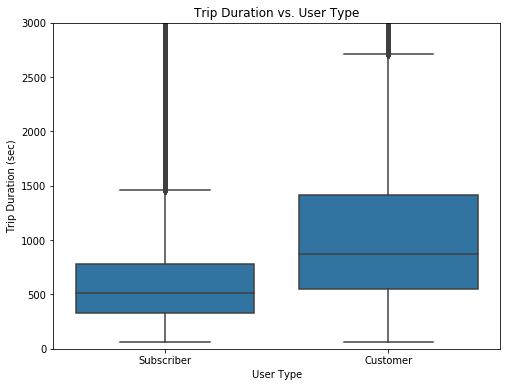

In [34]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = ride, x = 'user_type', y = 'duration_sec', color = default_color)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 3000])
plt.title("Trip Duration vs. User Type");

# Trip Duration vs. User Gender for different User Types

Male users have the least average duration of rides (shorter rides on average) in both subscriber and customer types. For subscriber users, both female and other users have almost the same average duration. On the other hand, for the customer users, females have considerably higher average trip duration than other and male users.


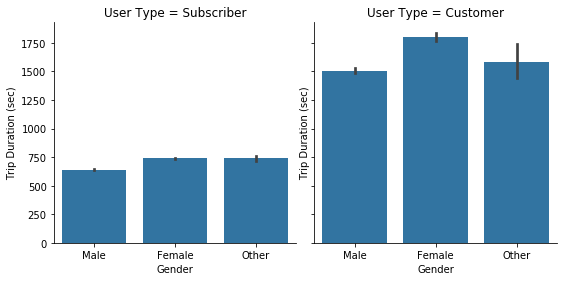

In [35]:
g = sb.FacetGrid(data = ride, col = 'user_type', size = 4)
g.map(sb.barplot, 'member_gender', 'duration_sec')
axes = g.axes.flatten()
axes[0].set_title("User Type = Subscriber")
axes[1].set_title("User Type = Customer")
for ax in g.axes.flat:
    ax.set_xlabel("Gender")
    ax.set_ylabel("Trip Duration (sec)");

# User Age vs. User Gender  for different User Types

Male Subscriber users are on average older than female subscriber users, and almost the same average age as other. In case of customer users, the same trends between males and females applies, however, the the average age of other users is higher than that of both the males and females.


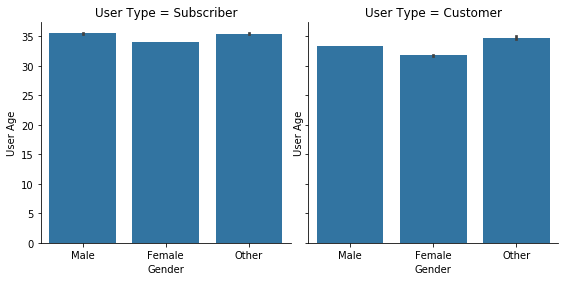

In [36]:
g = sb.FacetGrid(data = ride, col = 'user_type', size = 4)
g= g.map(sb.barplot, 'member_gender', 'user_age')
axes = g.axes.flatten()
axes[0].set_title("User Type = Subscriber")
axes[1].set_title("User Type = Customer")
for ax in g.axes.flat:
    ax.set_xlabel("Gender")
    ax.set_ylabel("User Age")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <slide_project>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!